<a href="https://colab.research.google.com/github/gustavo-campso/Mina-ou-Rocha/blob/main/Mina_ou_Rocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade Mina ou Rocha

Gustavo de Campos Soares

# Identificação do problema

O problema da atividade consiste em descobrir se o material analizado é uma mina ou uma rocha. O material foi analizado por uma sonar.
Sendo 111 minas e 97 rochas.

# Base de dados

**A base de Dados usada nesta atividade consiste em vários dados que represetam a frequência de uma onda em determinado material e isso decidirá se é uma mina ou uma rocha**

In [ ]:
!wget https://archive.ics.uci.edu/static/public/151/connectionist+bench+sonar+mines+vs+rocks.zip
!unzip connectionist+bench+sonar+mines+vs+rocks.zip # carregando a base de dados

--2024-05-10 21:30:40--  https://archive.ics.uci.edu/static/public/151/connectionist+bench+sonar+mines+vs+rocks.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘connectionist+bench+sonar+mines+vs+rocks.zip.1’

connectionist+bench     [  <=>               ]  63.88K   210KB/s    in 0.3s    

2024-05-10 21:30:41 (210 KB/s) - ‘connectionist+bench+sonar+mines+vs+rocks.zip.1’ saved [65413]

Archive:  connectionist+bench+sonar+mines+vs+rocks.zip
replace sonar.all-data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

connectionist+bench+sonar+mines+vs+rocks.zip  sample_data     sonar.mines  sonar.rocks
Index					      sonar.all-data  sonar.names
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.10

In [ ]:
!head sonar.all-data

0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.

# Classificação com k-NN

In [ ]:
import pandas as pd

Leitura

In [ ]:
df = pd.read_csv("sonar.all-data", sep=",", header=None)
df.info()

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
import numpy as np

In [ ]:
df.rename(columns={60: 'Result'}, inplace=True)
df["Result"] = np.where(df["Result"] == "R", "0", df["Result"])
df["Result"] = np.where(df["Result"] == "M", "1", df["Result"])
df_melhorado = df.astype({"Result": 'int64'})

In [ ]:
x = df.drop("Result", axis=1, inplace=False)
y = pd.Series(df["Result"], name="Result")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='10', ylabel='15'>

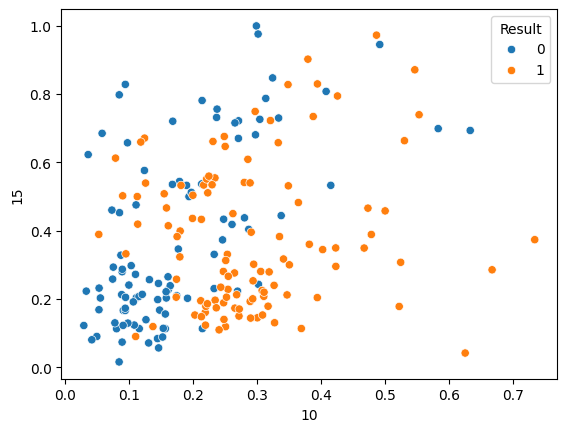

In [ ]:

col_X = 10
col_y = 15

sns.scatterplot(data=df, x=col_X, y=col_y, hue="Result")

<Axes: >

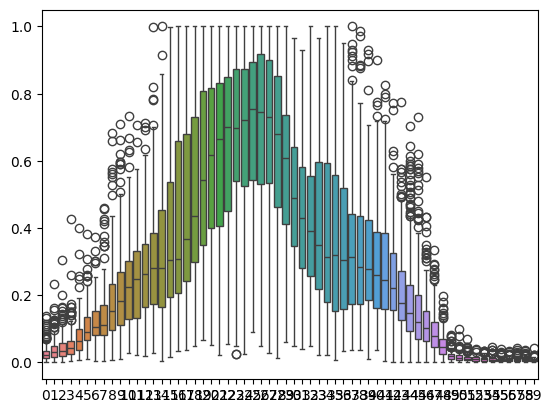

In [ ]:
sns.boxplot(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Modelo de ML - Acurácia

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
model = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('reduce_dims', PCA(n_components=14)),
    ('classifier', KNeighborsClassifier()),
])

# Hiper Parâmetros

In [ ]:
# Hyperparameter tuning with cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {
    'classifier__n_neighbors': [2, 16],
    'classifier__p': [1, 2, 3],
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

In [ ]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('reduce_dims', PCA(n_components=14)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [2, 16],
                         'classifier__p': [1, 2, 3]},
             return_train_score=True, scoring='accuracy')

In [ ]:
import numpy as np


def plot_search_results(grid):
    """
    Função extraída de https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results["mean_test_score"]
    stds_test = results["std_test_score"]
    means_train = results["mean_train_score"]
    stds_train = results["std_train_score"]

    ## Getting indexes of values per hyper-parameter
    masks = []
    masks_names = list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results["param_" + p_k].data == p_v))

    params = grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1, len(params), sharex="none", sharey="all", figsize=(15, 5))
    fig.suptitle("Score per parameter")
    fig.text(0.04, 0.5, "MEAN SCORE", va="center", rotation="vertical")
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i + 1 :])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle="--", marker="o", label="test")
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [ ]:
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)

NameError: name 'x_train' is not defined

In [ ]:
plot_search_results(grid_search_accuracy)

# Treinamendo do Modelo usado

In [ ]:
# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Generalização

In [ ]:
# Evaluate the model on the train set
train_score = best_model.score(X_train, y_train)
print("Train set accuracy:", train_score)

In [ ]:
# Evaluate the model on the test set
test_score = best_model.score(X_test, y_test)
print("Test set accuracy:", test_score)

In [ ]:
y_test_pred = best_model.predict(X_test)
print(y_test_pred.shape)

# Estudo e análise de erros

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_test_pred_accuracy)

In [ ]:
error_inds_accuracy = y_test_pred_accuracy != y_test
print(X_test[error_inds_accuracy])

In [ ]:
target_name = ["Rocha", "Mina"]
classes_dict_accuracy = pd.Series(target_name).to_dict()

In [ ]:
y_test[error_inds_accuracy].map(classes_dict_accuracy)

In [ ]:
pd.Series(y_test_pred_accuracy[error_inds_accuracy]).map(classes_dict_accuracy)